In [1]:
%load_ext nb_black

ModuleNotFoundError: No module named 'nb_black'

In [1]:
import numpy as np
import math
from domain import (
    H_eps,
    H_eps_derivative,
    EPS,
    gradient_descent,
    grad_phi_part,
    grad_w_part,
    get_frontier_phi,
)
from scipy.ndimage.interpolation import shift
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from segmenter import Segmenter

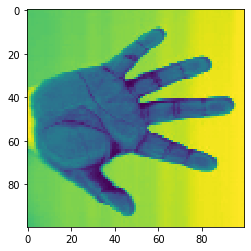

In [2]:
from PIL import Image

img = Image.open("../data/test/src_hand.jpg").convert("L")
img = img.resize((100, 100))
img = np.array(img)
mean = np.mean(img)
std = np.std(img)
img = (img - mean) / std
plt.imshow(img)

In [3]:
test = np.random.uniform(-1, 1, img.shape)

In [4]:
optimiser_param = {
    "u": img,
    "step_w": 0.1,
    "step_phi": 0.1,
    "eps": 1,
    "lambda_": 0.5,
    "mu": 0.5,
    "it": 25,
    "verbose": True,
    "mode": "standard",
    "test": test,
}

In [5]:
segmenter = Segmenter(optimiser_param)

In [6]:
segmenter.segment()

itération 0/25
itération 0 : w gradient: 62.12190240689528
itération 0 : phi gradient: 57.11944949938548
itération 0 munford_shah functional: 44646.31095455081
itération 1/25
itération 1 : w gradient: 34.76873191135679
itération 1 : phi gradient: 48.32678899998315
itération 1 munford_shah functional: 44063.979191739025
itération 2/25
itération 2 : w gradient: 22.535586433304694
itération 2 : phi gradient: 39.301846517970226
itération 2 munford_shah functional: 43662.441935799725
itération 3/25
itération 3 : w gradient: 15.891624277862732
itération 3 : phi gradient: 31.352710452755904
itération 3 munford_shah functional: 43366.02434362976
itération 4/25
itération 4 : w gradient: 11.844543628843196
itération 4 : phi gradient: 24.97793637589249
itération 4 munford_shah functional: 43135.52134136862
itération 5/25
itération 5 : w gradient: 9.164272312150526
itération 5 : phi gradient: 20.173810537006243
itération 5 munford_shah functional: 42951.799437143316
itération 6/25
itération 6 : w 

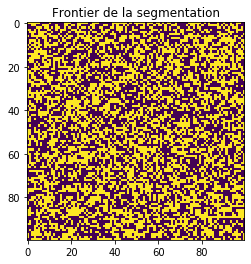

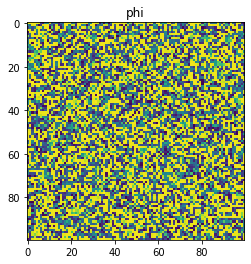

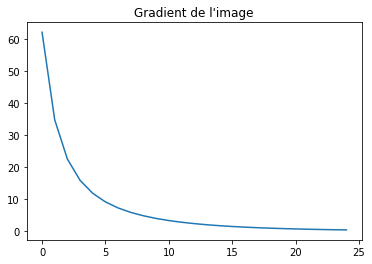

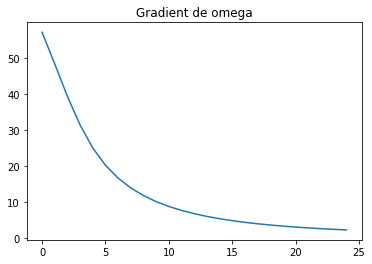

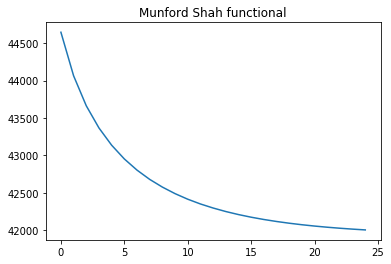

In [7]:
segmenter.plot_stats()